In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, KFold     # for splitting data into training and testing
from sklearn.neighbors import KNeighborsClassifier      # for K nearest neighbours
from sklearn.metrics import accuracy_score      # for accuracy calculation

import matplotlib.pyplot as plt     # for plotting
import seaborn as sns   # for heatmap


In [2]:
df=pd.read_csv("BankNoteAuthentication.csv")  # read the data

In [3]:
df.describe()   # Get summary of each column.

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [4]:
x=df[["variance","skewness","curtosis","entropy"]]  # Features
y=df["class"]   # 1, 0  (target)

In [5]:
# Split data into training and test sets.
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.39, shuffle = True, random_state = 5)   

In [6]:
K=30   # You should test the classifier with different values of K to see which value provides the best performance for your classifier
knn=KNeighborsClassifier(K)         # Create a KNN classifier
knn.fit(x_train, y_train)           
y_pred_sklearn= knn.predict(x_test)     
print(y_pred_sklearn)        

[1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0
 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0
 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1
 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0
 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0
 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0
 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0
 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 1 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1
 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1
 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0
 1 1 1 0 0 0 1 0 1 0 1 0 

In [7]:
accuracy_score(y_test, y_pred_sklearn)

0.9888059701492538

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-pa

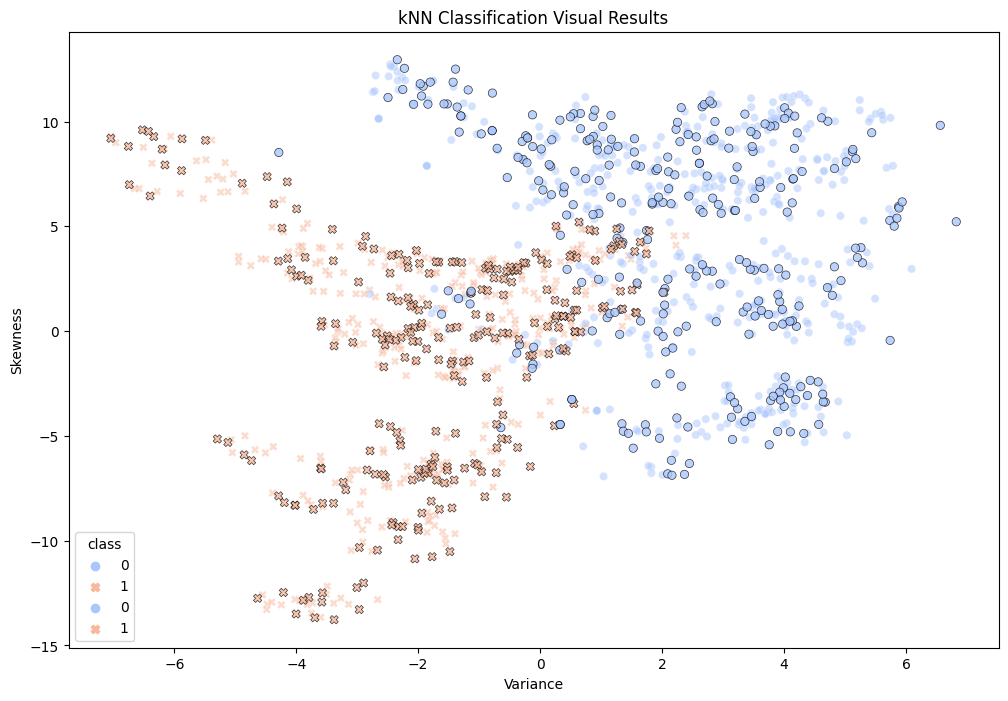

In [8]:
# Resetting the index of the test DataFrame to avoid index-related errors during plotting
x_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Start the plot
plt.figure(figsize=(12, 8))     # Set the figure size

# Plot training data in blue
sns.scatterplot(x=x_train['variance'], y=x_train['skewness'], 
                hue=y_train, style=y_train, palette='coolwarm',
                alpha=0.5, legend='brief')      # alpha sets the transparency level

# Overlay the test points with predicted labels in red
sns.scatterplot(x=x_test['variance'], y=x_test['skewness'], 
                hue=y_pred_sklearn, style=y_pred_sklearn, 
                palette='coolwarm', edgecolor='black', 
                alpha=0.8, legend='brief')

plt.title('kNN Classification Visual Results')      # Set the title
plt.xlabel('Variance')                # Set the x-axis label
plt.ylabel('Skewness')          # Set the y-axis label
plt.legend(title='class')           # Set the legend title
plt.show()                # Show the plot


In [9]:
n_splits= 2
k=31
kf= KFold(n_splits= n_splits, shuffle=True) ## Call the K Fold function
sum=0

for train_idx, test_idx in kf.split(x): ## Loop over the splits
    x_train = x.iloc[train_idx, :] ## fetch the values
    x_test = x.iloc[test_idx, :]

    y_train = y.iloc[train_idx] 
    y_test = y.iloc[test_idx]  

    knn=KNeighborsClassifier(k) ## Create the classifier
    knn.fit(x_train, y_train)   ## Fit the classifier

    y_pred_test = knn.predict(x_test) ## Predict the test values

    #print(accuracy_score(y_pred_test, y_test))

    sum += accuracy_score(y_pred_test, y_test) ## Sum the accuracies


print(sum/n_splits)     ## Print the average accuracy

0.9846938775510204


In [ ]:
K=30   # You should test the classifier with different values of K to see which value provides the best performance for your classifier
knn=KNeighborsClassifier(K)         # Create a KNN classifier
knn.fit(x_train, y_train)           
y_pred_sklearn= knn.predict(x_test)     
print(y_pred_sklearn)        